In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_california_housing
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

ABOUT DATASET

MedInc (Median Income): Bir bölgedeki hanelerin medyan (orta değer) geliri (on binlerce ABD doları cinsinden).

HouseAge: Bir bölgedeki evlerin medyan yaşı (yıl cinsinden). Daha düşük bir değer, daha yeni evleri gösterir.

AveRooms (Average Rooms): Bir haneye düşen ortalama oda sayısı (Toplam oda sayısının toplam hane sayısına bölünmesiyle hesaplanır).

AveBedrms (Average Bedrooms): Bir haneye düşen ortalama yatak odası sayısı (Toplam yatak odası sayısının toplam hane sayısına bölünmesiyle hesaplanır).

Population: Bir bölgede yaşayan toplam insan sayısı.

AveOccup (Average Occupancy): Bir haneye düşen ortalama kişi sayısı (Toplam nüfusun toplam hane sayısına bölünmesiyle hesaplanır).

Latitude: Bölgenin enlem değeri; daha yüksek bir değer, daha kuzeyde olduğunu gösterir.

Longitude: Bölgenin boylam değeri; daha yüksek bir değer, daha batıda olduğunu gösterir..

In [5]:
california = fetch_california_housing()

In [6]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Info #####################")
    print(dataframe.info())
check_df(df)

##################### Shape #####################
(20640, 8)
##################### Types #####################
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
##################### Head #####################
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
##################### Tail #####################
       MedInc  HouseAge  AveRooms  AveBedrms  Populati

In [8]:
X = california.data
y = california.target

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#standart scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

mse_lin = mean_squared_error(y_test,y_pred_lin)
r2_lin = r2_score(y_test,y_pred_lin)

print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")

Linear Regression MSE: 0.5281699010340762, R2: 0.6100528196601276


In [11]:
#Ridge L2 regression
ridge_params = {"alpha":[0.1,1,10,100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge,ridge_params, cv =5)
ridge_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [12]:
y_pred_ridge = ridge_grid.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression MSE: 0.5305277692955246, R2: 0.6083120084583447


In [13]:
print(f"Ridge Regression Best Alpha: {ridge_grid.best_params_}")

Ridge Regression Best Alpha: {'alpha': 100}


In [14]:
#lasso L1 REgression
lasso_params = {"alpha":[0.1,1,10,100]}
lasso = Lasso(max_iter = 10000)
lasso_grid = GridSearchCV(lasso,lasso_params,cv = 5)
lasso_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.1, 1, 10, 100]})

In [15]:
y_pred_lasso = lasso_grid.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression MSE: 0.6921625366165172, R2: 0.4889772609872919


In [16]:
print(f"Lasso Regression Best Alpha: {lasso_grid.best_params_}")

Lasso Regression Best Alpha: {'alpha': 0.1}


In [17]:
#ElasticNet Training and hyperparameter tuning
elastic_params = {"alpha":[0.1,1,10], "l1_ratio":[0.2,0.5,0.8]}
elastic = ElasticNet(max_iter = 10000)
elastic_grid = GridSearchCV(elastic,elastic_params,cv = 5)
elastic_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]})

In [18]:
y_pred_elastic = elastic_grid.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test,y_pred_elastic)
r2_elastic = r2_score(y_test,y_pred_elastic)
print(f"Lasso Regression MSE: {mse_elastic}, R2: {r2_elastic}")

Lasso Regression MSE: 0.6103558063229079, R2: 0.5493750681102677


In [19]:
#model comparision
models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"]
mses = [mse_lin, mse_ridge, mse_lasso, mse_elastic]
r2s = [r2_lin, r2_ridge, r2_lasso, r2_elastic]

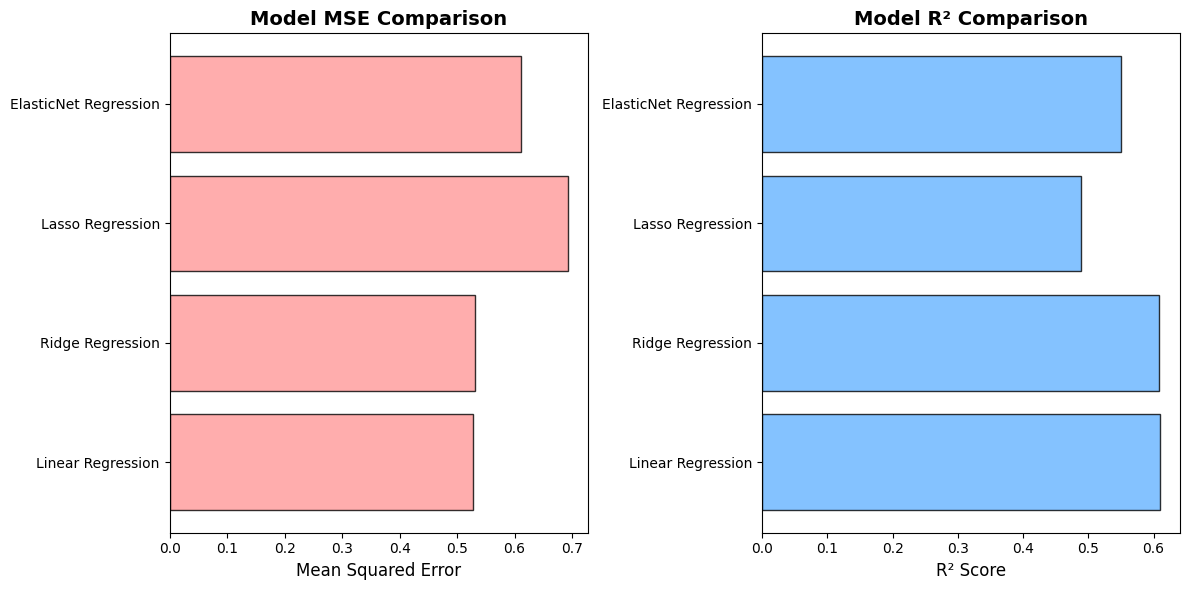

In [20]:
# Graphic Size
plt.figure(figsize=(12, 6))

# MSE 
plt.subplot(1, 2, 1)
plt.barh(models, mses, color="#ff9999", edgecolor="black", alpha=0.8)
plt.xlabel("Mean Squared Error", fontsize=12)
plt.title("Model MSE Comparison", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# R2 
plt.subplot(1, 2, 2)
plt.barh(models, r2s, color="#66b3ff", edgecolor="black", alpha=0.8)
plt.xlabel("R² Score", fontsize=12)
plt.title("Model R² Comparison", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()